<a href="https://colab.research.google.com/github/nguyendonghuynhlang26123/Project03/blob/master/18127136_18127003_ExperimentingModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## for GG COLAB
from google.colab import drive
import os
drive.mount('/content/drive')
!cd '/content/drive/My Drive/Colab Notebooks/dataset/Small'
os.chdir('./drive/My Drive/Colab Notebooks/dataset/Small/')

In [45]:
import sys
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.optimizers.schedules import ExponentialDecay

# Simple VGGnet (1,2,3 block) 

In [46]:
def VGG1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# define cnn model
def VGG2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define cnn model
def VGG3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [56]:
#Ploting
def plot_model(history, fname):
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')

	plt.subplot(213)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.savefig('plot/'+ fname + '_plot.png')
	plt.show()

# run the test harness for evaluating a model
def run(model, filename):
  model.summary()
  # fit model
  history = model.fit(train_it, steps_per_epoch=len(train_it),
  	validation_data=valid_it, validation_steps=len(valid_it), epochs=30, verbose=1)
  model.save(filename + '.h5')  
  # evaluate model
  _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
  print('> %.3f' % (acc * 100.0))
  
  # learning curves
  plot_model(history, filename)

In [48]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = datagen.flow_from_directory('train/',
	class_mode='binary', batch_size=64, target_size=(224, 224))
valid_it = datagen.flow_from_directory('valid/',
	class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('test/',
	class_mode='binary', batch_size=64, target_size=(224, 224))

Found 6400 images belonging to 2 classes.
Found 2560 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 401408)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               51380352  
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 129       
Total params: 51,381,377
Trainable params: 51,381,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 36s 356ms/step - loss: 0.8977 - accuracy: 0.5141 - va

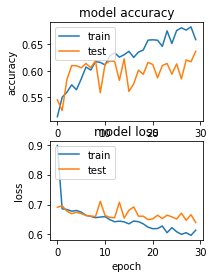

In [57]:
run(VGG1(), 'VGG1') # 1 block VGG model

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 200704)            0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               25690240  
_________________________________________________________________
dense_39 (Dense)             (None, 1)               

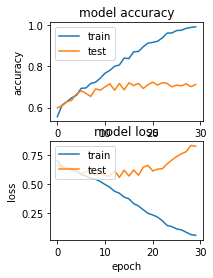

In [58]:
run(VGG2(), 'VGG2') # 2 block VGG model

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 100352)          

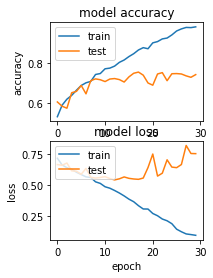

In [59]:
run(VGG3(), 'VGG3') # 3 block VGG model

In [60]:
mycallback = [EarlyStopping(patience=3, min_delta=0.001)]

#VGG16

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

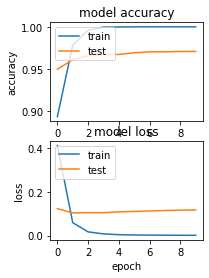

In [61]:
def define_model():
	# load model
	conv = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
 
	# add new classifier layers
	flat1 = Flatten()(conv.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
 
	# define new model
	model = Model(inputs=conv.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
model.summary()

# create data generator
datagen = ImageDataGenerator(featurewise_center=True)

# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow_from_directory('train/', class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('test/', class_mode='binary', batch_size=64, target_size=(224, 224))
valid_it = datagen.flow_from_directory('valid/', class_mode='binary', batch_size=64, target_size=(224, 224))
 
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=valid_it, validation_steps=len(valid_it), epochs=10, verbose=1)
	
#Save model
model.save('VGG16.h5')

# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
plot_model(history, "VGG16")

#VGG 16 + fine-tuning (All conv net)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

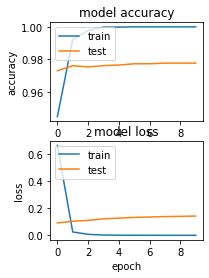

In [62]:
def define_model():
	# load model
	conv = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in conv.layers: # FREEZE all conv layers
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(conv.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=conv.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
model.summary()

# create data generator
datagen = ImageDataGenerator(featurewise_center=True)

# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow_from_directory('train/', class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('test/', class_mode='binary', batch_size=64, target_size=(224, 224))
valid_it = datagen.flow_from_directory('valid/', class_mode='binary', batch_size=64, target_size=(224, 224))

# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=valid_it, validation_steps=len(valid_it), epochs=10, verbose=1)
	
#Save model
model.save('VGG16_Freeze5.h5')

# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
plot_model(history, "VGG16_freeze5")

#VGG16 fine tuning trains the fifth convolutional block

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

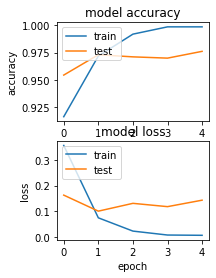

In [70]:
def define_model():
	# load model
	conv = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in conv.layers[:15]:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(conv.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=conv.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
model.summary()

# create data generator
datagen = ImageDataGenerator(featurewise_center=True)

# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow_from_directory('train/', class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('test/', class_mode='binary', batch_size=64, target_size=(224, 224))
valid_it = datagen.flow_from_directory('valid/', class_mode='binary', batch_size=64, target_size=(224, 224))

# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=valid_it, validation_steps=len(valid_it), epochs=10, verbose=1, callbacks=mycallback)
	
#Save model
model.save('VGG16_freeze4.h5')

# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
plot_model(history, "VGG16_freeze4")

#Tuning learning rate over time by decay rate + Data augmentation
$lr *= \frac{1}{1. + d * i}$

d: decate rate\
i: iteration 

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

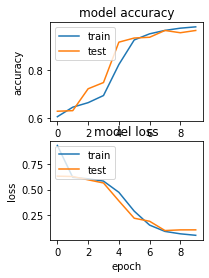

In [67]:
def define_model():
	# load model
	conv = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in conv.layers[:15]:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(conv.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=conv.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9, decay=0.001/10)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
model.summary()

# create data generator
train_datagen = ImageDataGenerator(featurewise_center=True,	width_shift_range=0.01, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(featurewise_center=True)

# specify imagenet mean values for centering
test_datagen.mean = [123.68, 116.779, 103.939]
train_datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = train_datagen.flow_from_directory('train/', class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = test_datagen.flow_from_directory('test/', class_mode='binary', batch_size=64, target_size=(224, 224))
 
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	
#Save model
model.save('VGG16_Timebased_decay.h5')

# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
plot_model(history, "VGG16_Timebased_decay")

#Different decay rate approach

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

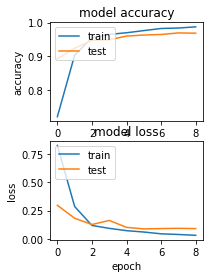

In [78]:
from keras.optimizers.schedules import PolynomialDecay

init_learning_rate = 0.001 
def define_model():
	# load model
	conv = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in conv.layers[:15]:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(conv.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=conv.inputs, outputs=output)
	# compile model
	learning_rate_fn = PolynomialDecay(
    init_learning_rate,
    decay_steps=1000,
    end_learning_rate=0.0001,
    power=0.5)
	opt = SGD(learning_rate=learning_rate_fn, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
model.summary()

# create data generator
train_datagen = ImageDataGenerator(featurewise_center=True,	width_shift_range=0.01, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(featurewise_center=True)

# specify imagenet mean values for centering
test_datagen.mean = [123.68, 116.779, 103.939]
train_datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = train_datagen.flow_from_directory('train/', class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = test_datagen.flow_from_directory('test/', class_mode='binary', batch_size=64, target_size=(224, 224))
 
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1, callbacks=mycallback)
	
#Save model
model.save('VGG16_PolyDecay.h5')

# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
plot_model(history, "VGG16_PolyDecay")